In [16]:
!pip install pymysql
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install matplotlib

In [17]:
import pandas as pd
import os
from sqlalchemy import create_engine,text
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pymysql.cursors
import seaborn as sns
import getpass

# Database connection information

In [18]:
DB_HOST = "den1.mysql6.gear.host"
DB_NAME = "situation"
DB_USER = "situation"
DB_PASSWORD = getpass.getpass("Enter your database password: ")

Enter your database password: ··········


In [19]:
# Establish connection to the database
DATABASE_URI = f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}/{DB_NAME}"
engine = create_engine(DATABASE_URI)

# Fetch data from the database using read_sql_table

In [20]:
df_degradation = pd.read_sql_table('g7_les_unit_operations_degradation', engine)
df_params = pd.read_sql_table('g7_les_uo_params', engine)

In [21]:
# Display settings to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [22]:
# Display the DataFrames
print("Degradation Data:")
display(df_degradation)

print("\nParameters Data:")
display(df_params)

Degradation Data:


,id,reactor_robot_id,experiment_group,workflow_step,parameter_name,parameter_value,execution_time,inefficiency_score
0,1,RR101,Group2,Step1,Viscosity,344.139346,2024-05-13 11:30:53,0.087365
1,2,RR104,Group3,Step1,Viscosity,218.951722,2024-05-13 11:35:53,0.023142
2,3,RR102,Group1,Step1,Pressure,364.330959,2024-05-13 11:40:53,0.142511
3,4,RR101,Group2,Step1,Viscosity,274.381862,2024-05-13 11:45:53,0.096173
4,5,RR104,Group2,Step1,Pressure,364.520609,2024-05-13 11:50:53,0.147191
5,6,RR104,Group2,Step3,Temp,307.759477,2024-05-13 11:55:53,0.174613
6,7,RR104,Group1,Step1,Viscosity,317.576284,2024-05-13 12:00:53,0.195349
7,8,RR104,Group3,Step3,Viscosity,250.397315,2024-05-13 12:05:53,0.172603
8,9,RR102,Group1,Step2,Temp,386.825090,2024-05-13 12:10:53,0.012226
9,10,RR104,Group3,Step2,Viscosity,293.197060,2024-05-13 12:15:53,0.078396



Parameters Data:


,Unit_Operation_ID,UOName,UODescription,UOParams
0,UO001,Distillation,Separation of components in a liquid mixture b...,"['Mixture', 'Temperature', 'Pressure', 'Heatin..."
1,UO002,Dry,Removal of moisture or water from a substance,"['Product', 'DryingMethod', 'DryingTemperature..."
2,UO003,Mixing,Combine two or more substances to create a hom...,"[{'Ingredients' : {'Ingredient': {'Name', 'Qua..."
3,UO004,Washing,"Removal of impurities, unwanted substances, or...","['MaterialToBeWashed', 'Impurities', 'WashingS..."
4,UO005,Weighing,Transfer specific amounts of powder or liquid ...,"['Substance', 'Amount', 'Duration', 'BalanceTy..."
5,UO006,Absorption,Transfer of one or more substances from a gase...,"['GasStream', 'LiquidPhase', 'Solvent', 'Tempe..."
6,UO007,Centrifugation,Separate components in a mixture based on thei...,"['Sample', 'Speed', 'Time', 'Temperature', 'Pr..."
7,UO008,Evaporation,Convert a liquid into its vapor or gas phase,"['Product', 'EvaporationMethod', 'EvaporationT..."
8,UO009,Fermentation,"Convert organic compounds, such as sugars, int...","['MicroorganismStrain', 'InoculumSize', 'Feeds..."
9,UO010,Ion Exchange,Exchange of ions between a solid material,"['IonExchangeResinType', 'IonExchangeCapacity'..."


No charts were generated by quickchart


# Analyze the data

In [23]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df_degradation.describe())


Summary Statistics:
              id  parameter_value       execution_time  inefficiency_score
count  44.000000        44.000000                   44           44.000000
mean   22.500000       272.540530  2024-05-13 13:18:23            0.098133
min     1.000000       105.757959  2024-05-13 11:30:53            0.012226
25%    11.750000       225.105316  2024-05-13 12:24:38            0.051877
50%    22.500000       283.292917  2024-05-13 13:18:23            0.094356
75%    33.250000       341.942569  2024-05-13 14:12:08            0.144677
max    44.000000       399.654102  2024-05-13 15:05:53            0.195349
std    12.845233        78.453884                  NaN            0.055293


In [24]:
# Maximum and minimum values for numerical columns
print("\n\nMaxima:")
print(df_degradation.select_dtypes(include=['float64', 'int64']).max())

print("\n\nMinima:")
print(df_degradation.select_dtypes(include=['float64', 'int64']).min())



Maxima:
id                     44.000000
parameter_value       399.654102
inefficiency_score      0.195349
dtype: float64


Minima:
id                      1.000000
parameter_value       105.757959
inefficiency_score      0.012226
dtype: float64


In [25]:
# Mean values for numerical columns
print("\n\nMean:")
print(df_degradation.select_dtypes(include=['float64', 'int64']).mean())



Mean:
id                     22.500000
parameter_value       272.540530
inefficiency_score      0.098133
dtype: float64


# HTML

In [26]:
# Export DataFrames as HTML
df_degradation.to_html('degradation_data.html')
df_params.to_html('params_data.html')

# Displaying the exported HTML tables
from IPython.display import HTML

print("Degradation Data:")
display(HTML(df_degradation.to_html()))

print("\nParameters Data:")
display(HTML(df_params.to_html()))

Degradation Data:


,id,reactor_robot_id,experiment_group,workflow_step,parameter_name,parameter_value,execution_time,inefficiency_score
0,1,RR101,Group2,Step1,Viscosity,344.139346,2024-05-13 11:30:53,0.087365
1,2,RR104,Group3,Step1,Viscosity,218.951722,2024-05-13 11:35:53,0.023142
2,3,RR102,Group1,Step1,Pressure,364.330959,2024-05-13 11:40:53,0.142511
3,4,RR101,Group2,Step1,Viscosity,274.381862,2024-05-13 11:45:53,0.096173
4,5,RR104,Group2,Step1,Pressure,364.520609,2024-05-13 11:50:53,0.147191
5,6,RR104,Group2,Step3,Temp,307.759477,2024-05-13 11:55:53,0.174613
6,7,RR104,Group1,Step1,Viscosity,317.576284,2024-05-13 12:00:53,0.195349
7,8,RR104,Group3,Step3,Viscosity,250.397315,2024-05-13 12:05:53,0.172603
8,9,RR102,Group1,Step2,Temp,386.825090,2024-05-13 12:10:53,0.012226
9,10,RR104,Group3,Step2,Viscosity,293.197060,2024-05-13 12:15:53,0.078396



Parameters Data:


,Unit_Operation_ID,UOName,UODescription,UOParams
0,UO001,Distillation,Separation of components in a liquid mixture based on their differences in boiling points,"['Mixture', 'Temperature', 'Pressure', 'HeatingRate', 'CoolingRate', 'DistillateCollectors', 'RefluxRatio', 'SolventSelection', 'ResidueLimit', 'DistillationEfficiency', 'RecoveryRate', 'QualityControlChecks', 'RegulatoryCompliance', 'Recordkeeping', 'ValidationParameters', 'SolventRecycling', 'SafetyConsiderations', 'Equipment']"
1,UO002,Dry,Removal of moisture or water from a substance,"['Product', 'DryingMethod', 'DryingTemperature', 'DryingTime', 'Humidity', 'ParticleSize', 'Quantity', 'DryingContainer', 'ShelfConfiguration', 'AirflowRate', 'SafetyConsiderations', 'Equipment', 'QualityControlChecks']"
2,UO003,Mixing,Combine two or more substances to create a homogenous mixture,"[{'Ingredients' : {'Ingredient': {'Name', 'Quantity'}}}, 'MixingMethod', 'MixingTime', 'MixingTemperature', 'MixingSpeed', 'MixingContainer', 'InertAtmosphere', 'SafetyMeasures', 'PostMixingTreatment', 'HomogeneityTesting', 'ValidationParameters']"
3,UO004,Washing,"Removal of impurities, unwanted substances, or residual chemicals from a solid material or liquid","['MaterialToBeWashed', 'Impurities', 'WashingSolventOrMedium', 'WashingTemperature', 'WashingTime', 'AgitationOrMixing', 'NumberOfWashingSteps', 'WashingVolumeOrRatio', 'FiltrationOrSeparation', 'Drying', 'SafetyMeasures', 'ProductQualityControl', 'WasteTreatment']"
4,UO005,Weighing,Transfer specific amounts of powder or liquid raw materials from the bulk container and into smaller units,"['Substance', 'Amount', 'Duration', 'BalanceType']"
5,UO006,Absorption,Transfer of one or more substances from a gaseous phase to a liquid or solid phase,"['GasStream', 'LiquidPhase', 'Solvent', 'Temperature', 'Pressure', 'Stirring', 'PH', 'MassTransferCoefficient', 'ContactTime', 'SafetyConsiderations', 'ReactionEnvironment', 'Equipment']"
6,UO007,Centrifugation,Separate components in a mixture based on their different densities using centrifugal force,"['Sample', 'Speed', 'Time', 'Temperature', 'Pressure', 'RotationDirection', 'SafetyConsiderations', 'Equipment']"
7,UO008,Evaporation,Convert a liquid into its vapor or gas phase,"['Product', 'EvaporationMethod', 'EvaporationTemperature', 'EvaporationTime', 'Solvent', 'Concentration', 'HeatingSource', 'SafetyConsiderations', 'Equipment', 'QualityControlChecks', 'AdditionalNotes']"
8,UO009,Fermentation,"Convert organic compounds, such as sugars, into other products, typically by the action of microorganisms like yeast or bacteria","['MicroorganismStrain', 'InoculumSize', 'Feedstock', 'NutrientComposition', 'pH', 'Temperature', 'AerationOrOxygenation', 'FermentationTime', 'AgitationOrMixing', 'FermentationVesselType', 'FermentationControlParameters', 'ProductRecovery', 'YieldAndProductivity', 'SafetyMeasures']"
9,UO010,Ion Exchange,Exchange of ions between a solid material,"['IonExchangeResinType', 'IonExchangeCapacity', 'FeedSolution', 'ContactTime', 'Temperature', 'FlowRate', 'RegenerationMethod', 'RegenerationFrequency', 'RegenerationTime', 'pHControl', 'ParticleSize', 'BedHeight', 'SafetyMeasures']"


# Visualizations

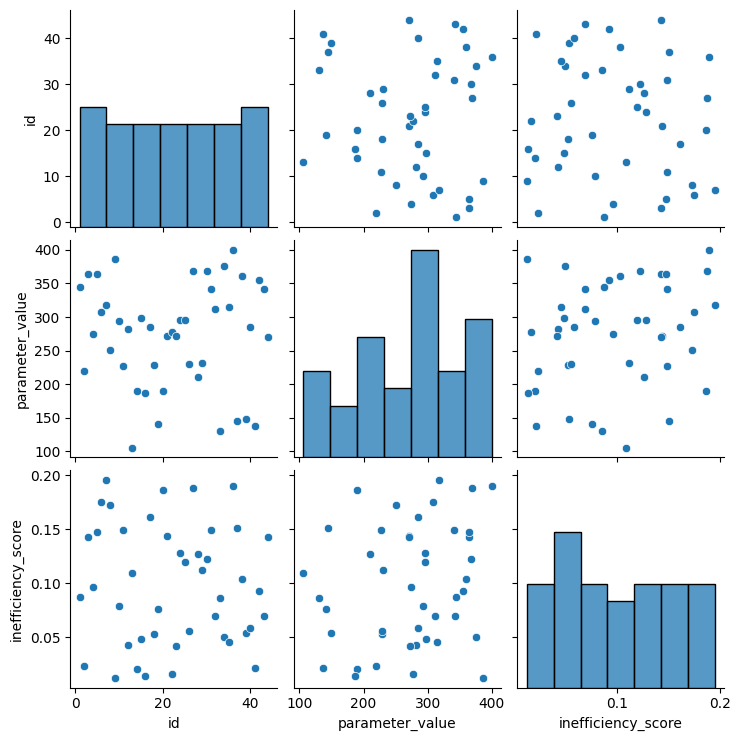

In [27]:
# Pairplot for visualizing relationships
sns.pairplot(df_degradation)
plt.show()

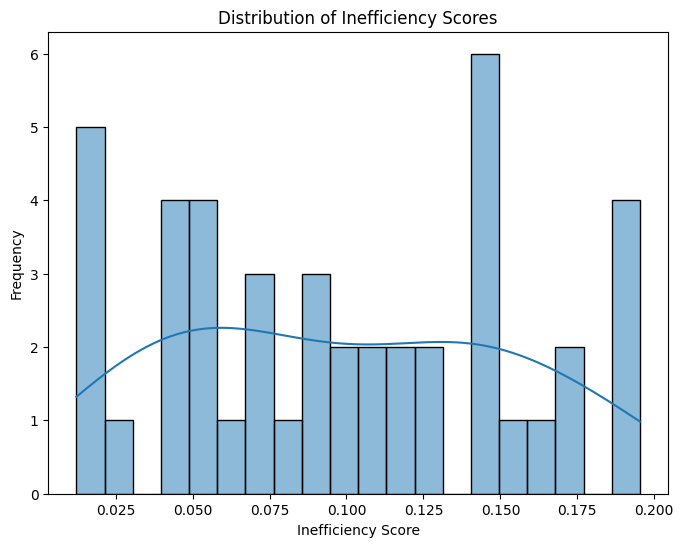

In [28]:
# Distribution of inefficiency scores
plt.figure(figsize=(8, 6))
sns.histplot(df_degradation['inefficiency_score'], bins=20, kde=True)
plt.title('Distribution of Inefficiency Scores')
plt.xlabel('Inefficiency Score')
plt.ylabel('Frequency')
plt.show()

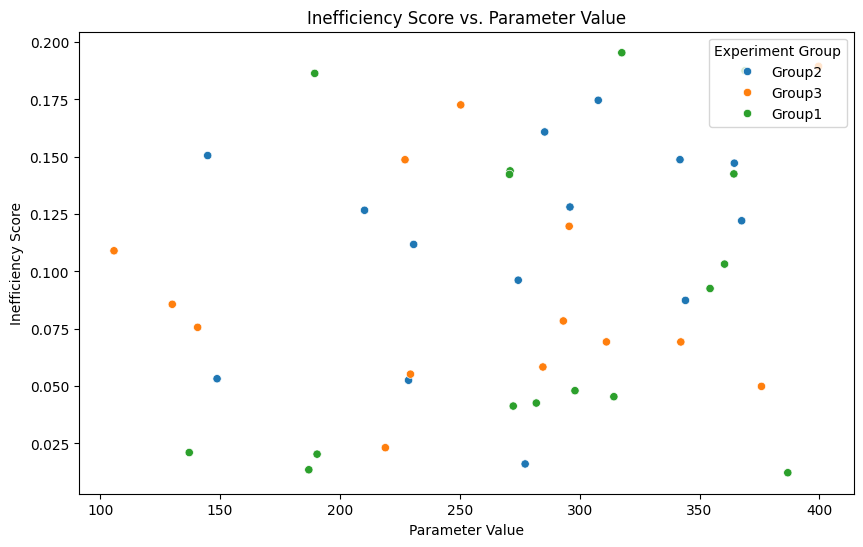

In [29]:
# Relationship between inefficiency score and parameter value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_degradation, x='parameter_value', y='inefficiency_score', hue='experiment_group')
plt.title('Inefficiency Score vs. Parameter Value')
plt.xlabel('Parameter Value')
plt.ylabel('Inefficiency Score')
plt.legend(title='Experiment Group', loc='upper right')
plt.show()

In [30]:
# Drop non-numeric columns
numeric_cols = df_degradation.select_dtypes(include=['number']).columns
df_numeric = df_degradation[numeric_cols]

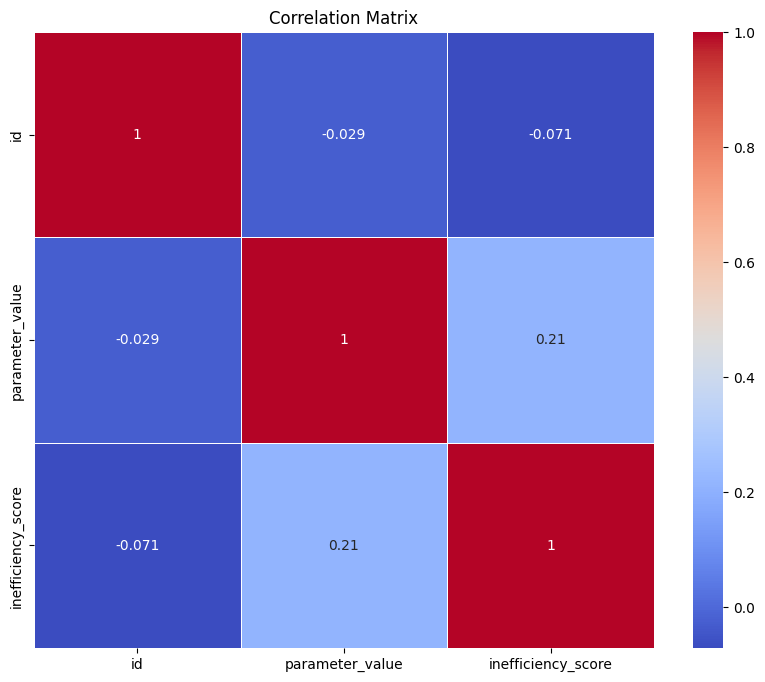

In [31]:
# Correlation matrix for num var
numerical_columns = df_degradation.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_degradation[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()